## Demo: Building a Data Product with Cocoon 🚀

Enterprises have numerous unprocessed raw data sources 📊.

These sources incorporate complex source system-specific logic, making them challenging for business and downstream apps to consume 🤔.

In this demo, you will build a dbt project with Cocoon that automatically 🌟:

1. Understands the raw data source 📈.
2. Integrates the business workflow 🔄.
3. Generates dbt code and documentation 📝.
4.Produces well-documented and modeled datasets as the final data product 📚.

This demo is based on TPC-DI 🛠️.

## Prerequisite

1. Install Cocoon
2. Configure OpenAI API Key (To obtain one, refer to [here](https://github.com/Cocoon-Data-Transformation/cocoon/tree/main#openai-api-key))
3. Download files


In [1]:
! pip install cocoon_data==0.1.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [2]:
! git clone https://github.com/zachary62/public_tpc_di/

Cloning into 'public_tpc_di'...
remote: Enumerating objects: 673, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 673 (delta 2), reused 10 (delta 2), pack-reused 661
Receiving objects: 100% (673/673), 86.43 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (188/188), done.
Updating files: 100% (658/658), done.


In [3]:
import os
import shutil

# Use the cache results to speed up the demo
source_dir = '/content/public_tpc_di/cache'
destination_dir = './'

for filename in os.listdir(source_dir):
    file_path = os.path.join(source_dir, filename)
    if os.path.isfile(file_path):
        shutil.copy(file_path, destination_dir)


In [4]:
from cocoon_data import *

In [8]:
# set up your api key
openai.api_key = ""

# test if it works
response = openai.ChatCompletion.create(
    model="gpt-4-1106-preview",
    messages=[
      {"role": "user", "content": "hello!"},
  ]
)

print(response['choices'][0]['message']["content"])

In [9]:
main_workflow = create_data_product_workflow("/content/public_tpc_di/tpcdi")

In [11]:
main_workflow.start_workflow()

## Your DBT project is also ready!

Check out the dbt project in the file directory. You can run the dbt project and generate the lineage graph.

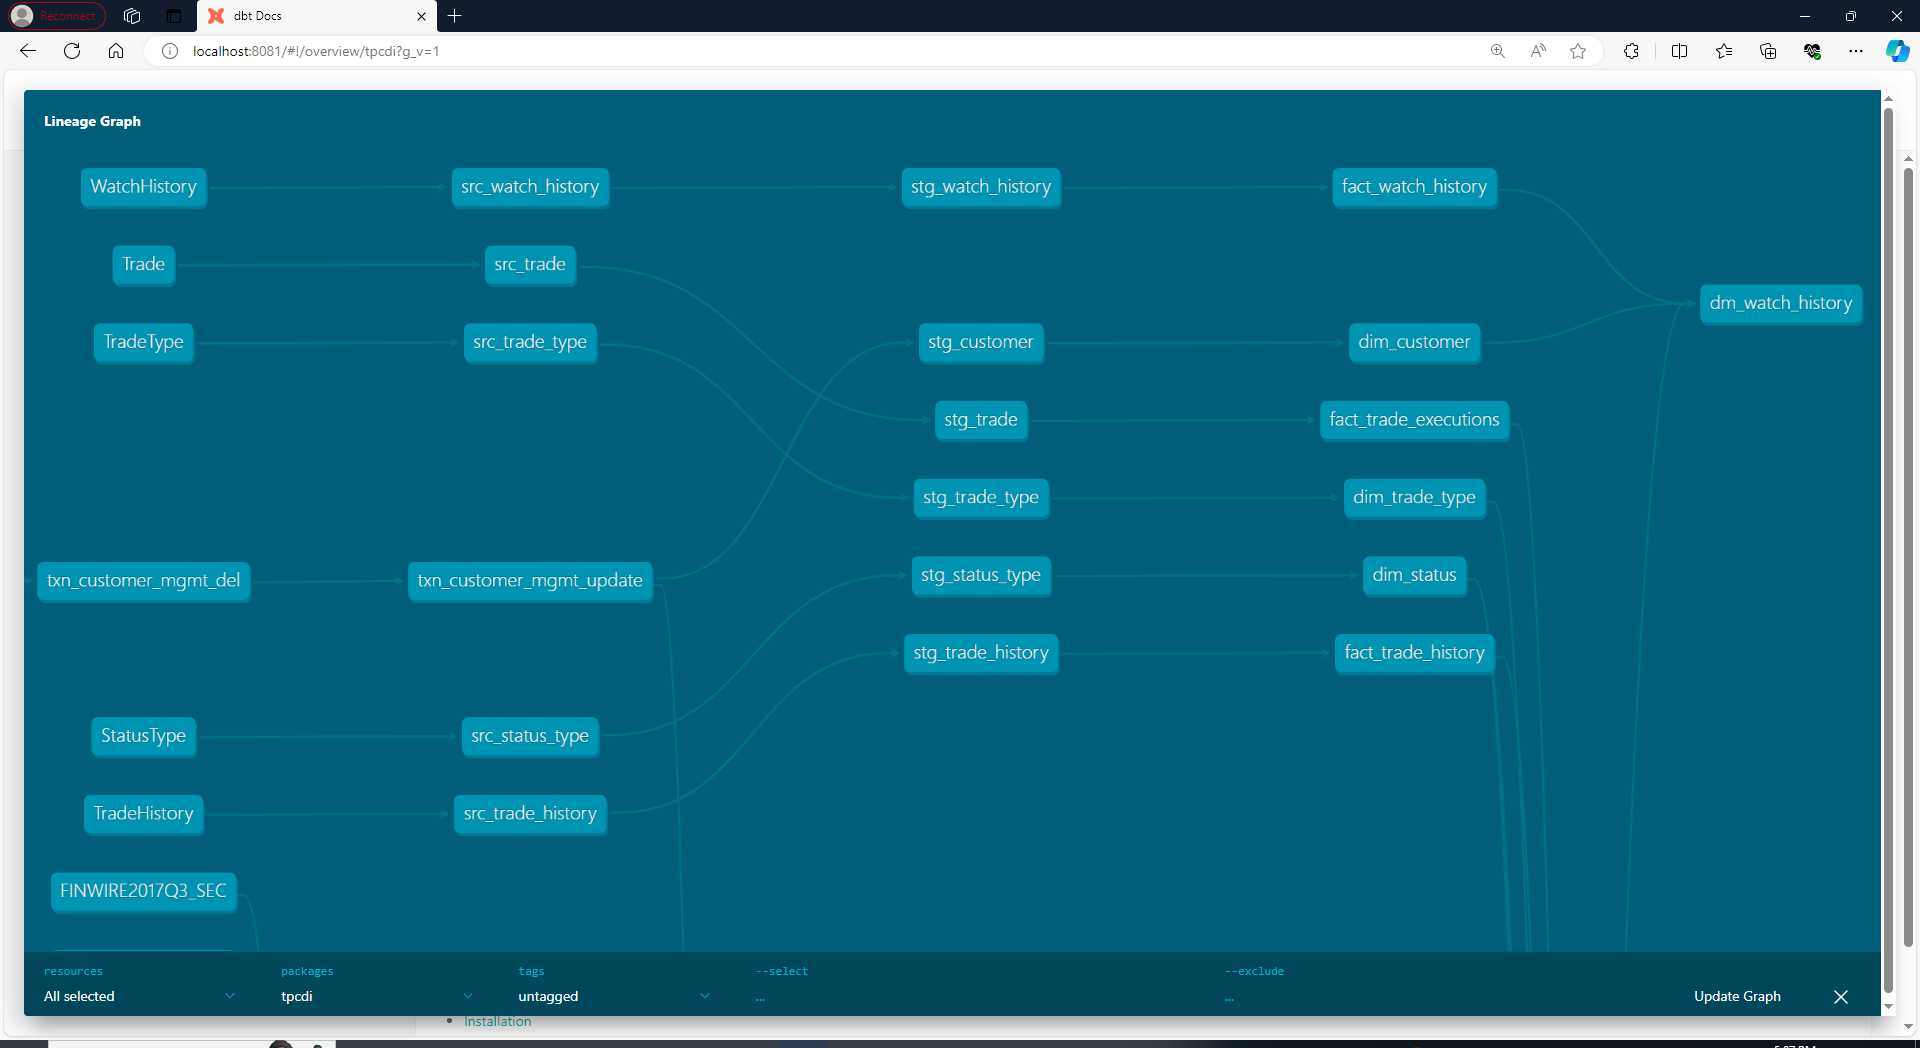